# Explanations visualization moleculized

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from pysmiles import read_smiles
import networkx as nx

import numpy as np
from rdkit_heatmaps import mapvalues2mol
from rdkit_heatmaps.utils import transform2png

### Definition and preparation of an exemplary compound.

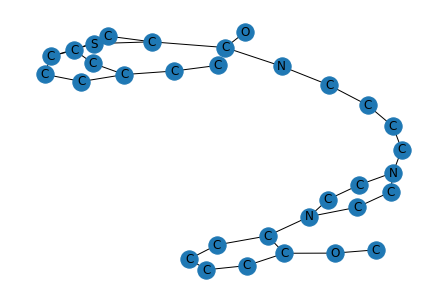

In [2]:
test_cpd_smile = "C#Cc1ccc2sc(C(=O)NCCCCN3CCN(c4ccccc4OC)CC3)cc2c1"
test_mol = Chem.MolFromSmiles(test_cpd_smile)
test_mol = Draw.PrepareMolForDrawing(test_mol)

pysmile_mol = read_smiles(test_cpd_smile)
labels = nx.get_node_attributes(pysmile_mol, 'element') 
nx.draw(pysmile_mol, labels = labels, pos=nx.spring_layout(pysmile_mol))

In [3]:
num_bonds = len(test_mol.GetBonds())
num_atoms = len(test_mol.GetAtoms())

print atoms in molecule

In [4]:
for i in range(num_atoms):
    print("Atom: ", i, " " , test_mol.GetAtomWithIdx(i).GetSymbol())

Atom:  0   C
Atom:  1   C
Atom:  2   C
Atom:  3   C
Atom:  4   C
Atom:  5   C
Atom:  6   S
Atom:  7   C
Atom:  8   C
Atom:  9   O
Atom:  10   N
Atom:  11   C
Atom:  12   C
Atom:  13   C
Atom:  14   C
Atom:  15   N
Atom:  16   C
Atom:  17   C
Atom:  18   N
Atom:  19   C
Atom:  20   C
Atom:  21   C
Atom:  22   C
Atom:  23   C
Atom:  24   C
Atom:  25   O
Atom:  26   C
Atom:  27   C
Atom:  28   C
Atom:  29   C
Atom:  30   C
Atom:  31   C


In [5]:
rdkit_bonds = {}

for i in range(num_bonds):
    init_atom = test_mol.GetBondWithIdx(i).GetBeginAtomIdx()
    end_atom = test_mol.GetBondWithIdx(i).GetEndAtomIdx()
    bond_type = test_mol.GetBondWithIdx(i).GetBondType()
    # print("Bond: ", i, " " , init_atom, "-" , end_atom, " ", bond_type)
    rdkit_bonds[(init_atom, end_atom)] = i
    #CNC(=O)CN1CN(c2ccccc2)C2(CCN(Cc3cc4c(cc3Cl)OCO4)CC2)C1=O
rdkit_bonds

{(0, 1): 0,
 (1, 2): 1,
 (2, 3): 2,
 (3, 4): 3,
 (4, 5): 4,
 (5, 6): 5,
 (6, 7): 6,
 (7, 8): 7,
 (8, 9): 8,
 (8, 10): 9,
 (10, 11): 10,
 (11, 12): 11,
 (12, 13): 12,
 (13, 14): 13,
 (14, 15): 14,
 (15, 16): 15,
 (16, 17): 16,
 (17, 18): 17,
 (18, 19): 18,
 (19, 20): 19,
 (20, 21): 20,
 (21, 22): 21,
 (22, 23): 22,
 (23, 24): 23,
 (24, 25): 24,
 (25, 26): 25,
 (18, 27): 26,
 (27, 28): 27,
 (7, 29): 28,
 (29, 30): 29,
 (30, 31): 30,
 (31, 2): 31,
 (30, 5): 32,
 (28, 15): 33,
 (24, 19): 34}

In [6]:
labels = nx.get_node_attributes(pysmile_mol, 'element') 

Using Shapley values as bond weights

In [10]:
phi = [0.011404462436786156,
-0.0020819504989476444,
0.0005683161599665023,
0.058223775528573815,
0.03652831051528425,
0.0032734397404942683,
-0.00555327871304374,
0.02272154960749591,
0.0005934221143857734,
0.006293774970758552,
0.0136801833208395,
0.06540478162417432,
-0.014524900122078615,
-0.008323405614512029,
-0.003742880297943309,
0.02265558929697919,
0.00710798981169466,
-0.007473669817976223,
-0.004933622655387857,
0.0034726538720510143,
0.04518596604640632,
-0.0023784012841279244,
0.015570899415682746,
0.028765402454357138,
0.05453983761142087,
0.02661340380242829,
0.028193525079155304,
-0.023968818164398744,
0.0048641119927245215,
-0.006489733162822659,
0.039260823684202736,
0.028397551737162532,
0.06159554262120207,
0.08709454402330313,
0.09440285855195146,
0.018843727187475744,
0.04467629971996299,
0.03239873542511758,
-0.0086559121465046,
0.061663014425320954,
-0.0010081163023238262,
0.02853168841469638,
-0.026316055537206458,
-0.005302635693635403,
-0.005750311736983768,
0.009335067095261418,
-0.01565093303841062,
0.005276058204685779,
-0.0010773864352301712,
0.005304239984452638,
0.005112596836821286,
-0.008915808996255235,
0.015298215800857424,
0.005352467250655528,
-0.011793477995761952,
0.0464452839939023,
-0.01186004571197231,
-0.01676338716571559,
0.03164715692066287,
0.01517735214570049,
0.010088239100554007,
0.02743692372529587,
0.019274243465957838,
0.013624121507179088,
0.008884998444696875,
0.011213699851618129,
-0.007501079287328246,
-0.011544343758188602,
-0.0024153990218377,
0.011880074562668702]

edge_index = [[ 0,  1,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  6,  7,  7,
          8,  8,  9,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 14, 15, 15,
         16, 16, 17, 17, 17, 17, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 22, 22,
         23, 23, 23, 24, 24, 24, 24, 25, 26, 27, 28, 28, 29, 29, 30, 30, 31, 31,
         31, 32],
        [ 1,  0,  2,  5,  1,  3,  2,  4,  3,  5,  1,  4,  6,  5,  7, 31,  6,  8,
          7,  9,  8, 10, 31,  9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 30, 14, 16,
         15, 17, 16, 18, 19, 30, 17, 19, 17, 18, 20, 19, 21, 29, 20, 22, 21, 23,
         22, 24, 28, 23, 25, 26, 27, 24, 24, 24, 23, 29, 20, 28, 14, 17,  6,  9,
         32, 31]]

Get a single Phi values for each edge by summing the Phis of both directions

In [11]:
rdkit_bonds
rdkit_bonds_phi = [0]*num_bonds
for i in range(len(phi)):
    phi_value = phi[i]
    init_atom = edge_index[0][i]
    end_atom = edge_index[1][i]
    
    if (init_atom, end_atom) in rdkit_bonds:
        bond_index = rdkit_bonds[(init_atom, end_atom)]
        rdkit_bonds_phi[bond_index] += phi_value
    if (end_atom, init_atom) in rdkit_bonds:
        bond_index = rdkit_bonds[(end_atom, init_atom)]
        rdkit_bonds_phi[bond_index] += phi_value

rdkit_bonds_phi

[0.009322511937838512,
 0.03709662667525075,
 -0.002279838972549472,
 0.023314971721881683,
 0.07169855659493288,
 -0.022848305736590642,
 0.0033651095137513507,
 -0.012407292473364081,
 0.04865861991845733,
 0,
 0.08115324141384916,
 0.00422470691475656,
 -0.0016256211700981377,
 0.06765837542136527,
 0.15599840117315353,
 0.06352002690743873,
 0.023742823278612976,
 0.035346958888114496,
 0.004032431401626015,
 -0.010374874833724842,
 0.004035210401591115,
 0.006382406804602189,
 -0.006441010745106424,
 0.029681896828186706,
 0.05908408064595874,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

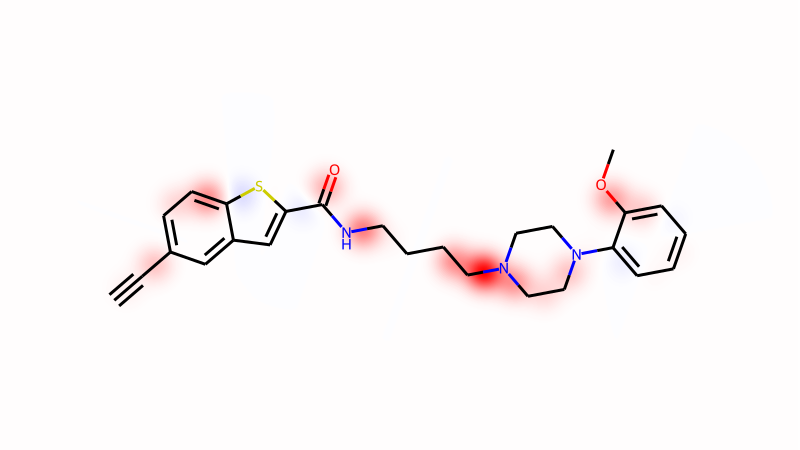

In [12]:
canvas = mapvalues2mol(test_mol, None, rdkit_bonds_phi, atom_width=0.2, bond_length=0.5, bond_width=0.5) #TBD: only one direction for edges? bonds weights is wrt rdkit bonds order?
img = transform2png(canvas.GetDrawingText())
# img.save("molecule.png")
img